# Decision Tree Overfitting
### Implementing a decision tree classifier at a range of depths to explore the effects of overfitting

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

## Load the data

In [6]:
X = np.load('data/Xdata.npy')
y = np.load('data/Ydata.npy')

## Split the training and test data using stratify


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Test the fit of different decision tree depths 

In [12]:
# Create depth options
depth_range = range(1, 51)

# Lists to store accuracies
train_accuracies = []
test_accuracies = []

# Iterate through the different tree depth options
for depth in depth_range:
    # Create a new decision tree with the current depth
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Train the tree
    tree.fit(X_train, y_train)
    
    # Predict the training and test labels
    y_train_pred = tree.predict(X_train)
    y_test_pred = tree.predict(X_test)
    
    # Compute the training accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)
    
    # Compute the test accuracy
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)

## Plot of training and test accuracies vs the tree depths  


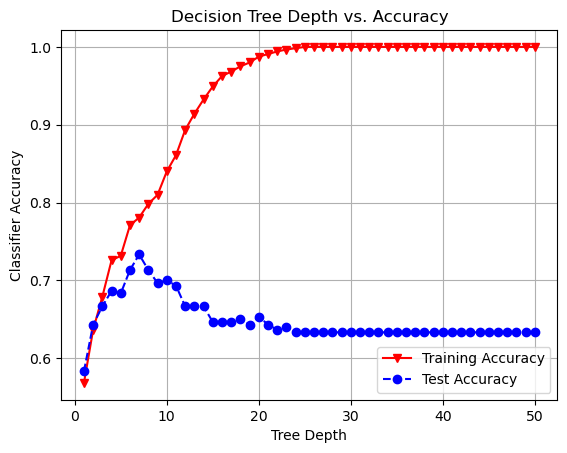

In [11]:
plt.plot(depth_range, train_accuracies, 'rv-', depth_range, test_accuracies, 'bo--')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Tree Depth')
plt.ylabel('Classifier Accuracy')
plt.title('Decision Tree Depth vs. Accuracy')
plt.grid(True)
plt.show()

## Model overfitting happens when the tree depth is greater than __7__.